In [2]:
import pandas as pd
import numpy as np
import plotly.express as plt

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import sklearn.metrics as m
from joblib import dump
import missingno as mso

In [3]:
url="diamonds.csv"
df=pd.read_csv(url)
df

,sno,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.isnull().sum()

sno        0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
df.nunique()

sno        53940
carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [6]:
df.drop("sno",axis=1,inplace=True)


In [7]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
num_cols=["carat","depth","table","x","y","z"]
cat_cols=["cut","color","clarity"]

In [9]:
num_trans=Pipeline( steps=[
    ("scaler",StandardScaler())
]
)

cat_trans=Pipeline( steps=[
    ("encoder",OneHotEncoder(drop="first",handle_unknown="ignore"))
]
)

processor=ColumnTransformer(transformers=[ 
    ("numerical",num_trans,num_cols),
    ("categorical",cat_trans,cat_cols)
])

model=Pipeline(steps=[ 
    ("processed",processor),
    ("selector",SelectKBest(mutual_info_regression)),
    ("regressor",RandomForestRegressor())
])

In [10]:
model

Pipeline(steps=[('processed',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('selector',
                 SelectKBest(score_func=<function mutual_info_regression at 0x000001F22C4D7400>)),
                ('regressor', RandomForestRegressor())])

In [11]:
x=df.drop("price",axis=1)
y=df["price"]

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [13]:
model.fit(xtrain,ytrain)

Pipeline(steps=[('processed',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('selector',
                 SelectKBest(score_func=<function mutual_info_regression at 0x000001F22C4D7400>)),
                ('regressor', RandomForestRegressor())])

In [14]:
ypred=model.predict(xtest)

In [15]:
print("Metrics")
print(f"MAE:{m.mean_absolute_error(ytest,ypred):.2f}")
print(f"MSE:{m.mean_squared_error(ytest,ypred):.2f}")
print(f"Accuracy:{m.r2_score(ytest,ypred):.2f}")

Metrics
MAE:504.66
MSE:1061027.14
Accuracy:0.93


In [16]:
print(f'Train Score: {model.score(xtrain, ytrain):.2f}')
print(f'Test Score: {model.score(xtest, ytest):.2f} ')

Train Score: 0.99
Test Score: 0.93 


<Axes: ylabel='Density'>

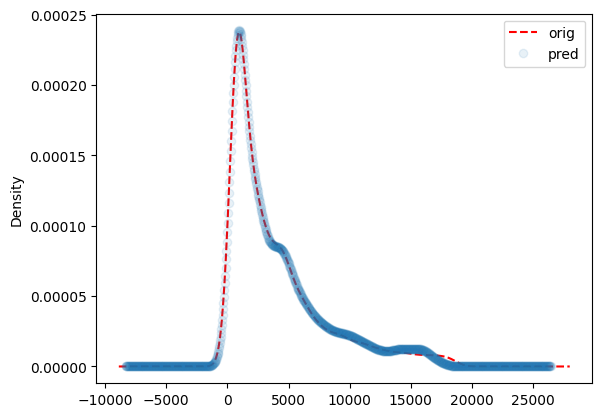

In [17]:
evaldf=pd.DataFrame([ytest.values,ypred],index=["orig","pred"]).T
ax=evaldf.plot(kind="kde",y="orig",style="r--")
evaldf.plot(kind="kde",y="pred",linewidth=6,alpha=.1,style="o",ax=ax)

In [18]:
dump(model,"diamonds.jb")

['diamonds.jb']